# Findabetes model

* Dataset: CDC Diabetes Health Indicators

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [35]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)



{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [37]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [38]:
X.describe()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [39]:
X.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [40]:
y.isna().sum()

Diabetes_binary    0
dtype: int64

In [41]:
X.isna().sum()



HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Feature selection

**Features that are less relevant for a Swedish context**

* AnyHealthcare - in most Swedish regions, all patients listed at a primary health clinic will be covered by subsidised healthcare. This project will take placce in Stockholm, where you have to be folkbokförd to belong to a primary clinic[1], meaning all patients at the clinic are eligable for subsidised health care [2].
* NoDocbcCost - Same reasoning as above
* Income - may not be irrelevant, but would need to be adapted to a Swedish context. It is likely that the correlation between income level and diabetes risk is not the same in Sweden as in the United States. Since this dataset reflects U.S. income thresholds, the feature is not directly relevant for our population and should therefore be excluded unless it can be replaced with a more context-appropriate measure.
* Education - same reasoning as above.

**Features where the patient is unlikely to know the answer**
* HighChol - need access to lab results/knowledge about results.
* CholCheck - All patients may not be aware of whether or not their cholesterol has been tested or when it was done most recently.
* BMI - should not be excluded, but the patient may not be aware of their BMI, and it may be useful to add a bmi-calculator to the dashboard.


In [42]:
X = X.drop(columns=['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education', 'HighChol', 'CholCheck'])
X.head()

,HighBP,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
2,1,28,0,0,0,0,1,0,0,5,30,30,1,0,9
3,1,27,0,0,0,1,1,1,0,2,0,0,0,0,11
4,1,24,0,0,0,1,1,1,0,2,3,0,0,0,11


# EDA

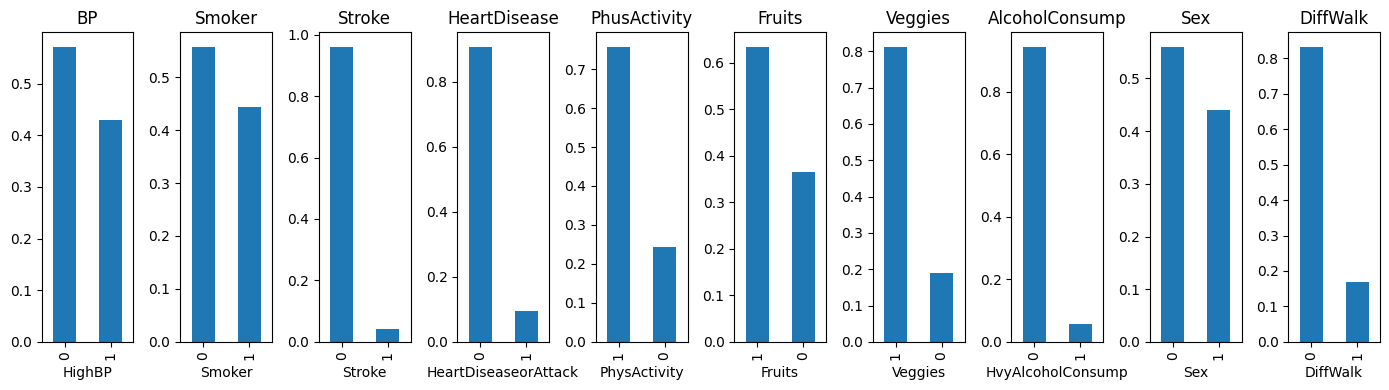

In [43]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(14,4))

X["HighBP"].value_counts(normalize=True).plot(kind="bar", ax=ax1, title="BP")
X["Smoker"].value_counts(normalize=True).plot(kind="bar", ax=ax2, title="Smoker")
X['Stroke'].value_counts(normalize=True).plot(kind="bar", ax=ax3, title="Stroke")
X['HeartDiseaseorAttack'].value_counts(normalize=True).plot(kind="bar", ax=ax4, title="HeartDisease")
X['PhysActivity'].value_counts(normalize=True).plot(kind="bar", ax=ax5, title="PhusActivity")
X['Fruits'].value_counts(normalize=True).plot(kind="bar", ax=ax6, title="Fruits")
X['Veggies'].value_counts(normalize=True).plot(kind="bar", ax=ax7, title="Veggies")
X['HvyAlcoholConsump'].value_counts(normalize=True).plot(kind="bar", ax=ax8, title="AlcoholConsump")
X['Sex'].value_counts(normalize=True).plot(kind="bar", ax=ax9, title="Sex")
X['DiffWalk'].value_counts(normalize=True).plot(kind="bar", ax=ax10, title="DiffWalk")

plt.tight_layout()
plt.show()

In [44]:
pd.crosstab(X["PhysActivity"], X["DiffWalk"], normalize="index")

DiffWalk,0,1
PhysActivity,,
0,0.664832,0.335168
1,0.885499,0.114501


## Featues to consdier

**Fruits, Greens, PhysActivity**

The timing of data collection is not clearly specified. It is plausible that individuals who have lived with a diabetes diagnosis for some time may have already adjusted their diet and increased their consumption of fruits and vegetables. If so, this feature could misleadingly suggest a stronger association between green consumption and diabetes than what actually exists, thereby risking bias in the model.

**Difficilty walking**

Only 11% of those with difficulty walking are physically active. Maybe this feature does not add a lot of new info? The relevance it has on diabetes is probably linked to lower physical activity, which means it is covered by that feature anyway. Then again, it may contain people that have difficulty walking *because* of their diabetes, e.g., becuause of neuropathy, which means it may be a usesful indicator on its own. 

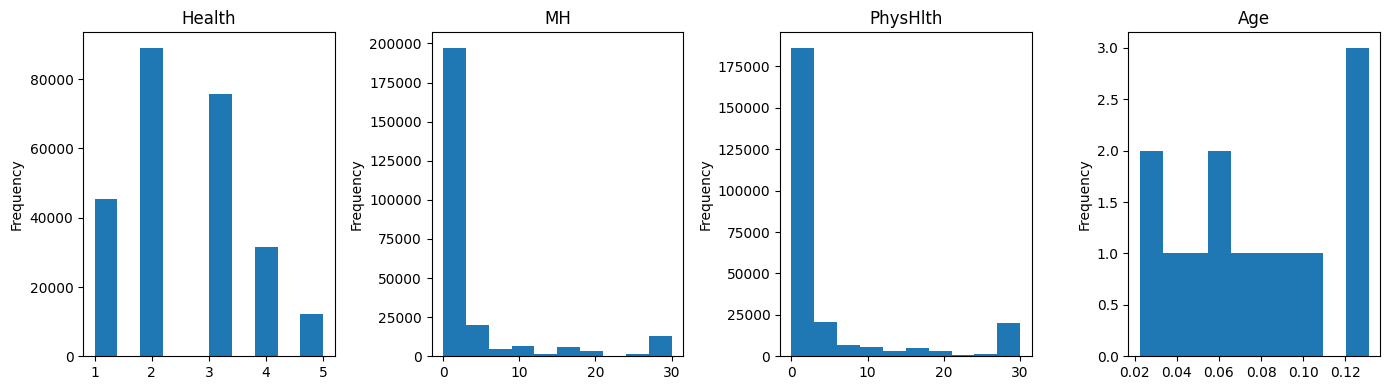

In [45]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))

X["GenHlth"].plot(kind="hist", ax=ax1, title="Health")
X["MentHlth"].plot(kind="hist", ax=ax2, title="MH")
X['PhysHlth'].plot(kind="hist", ax=ax3, title="PhysHlth")
X['Age'].value_counts(normalize=True).plot(kind="hist", ax=ax4, title="Age")

plt.tight_layout()
plt.show()

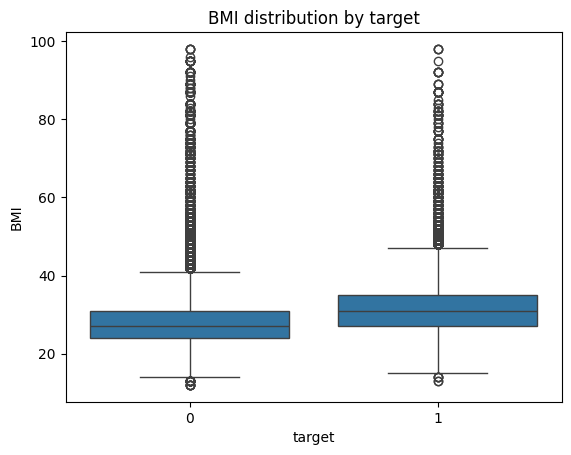

In [46]:
df = X.copy()
df['target'] = y

sns.boxplot(data=df, x="target", y="BMI")
plt.title("BMI distribution by target")
plt.show()


The boxplot shows that the median BMI is clearly higher in the diabetes group compared to those without diabetes. However, the extreme outliers (BMI > 60–100) appear in both groups and do not provide meaningful separation between the two. This suggests that such extreme values act more as noise than as signal. In fact, the non diabetes group has higher outliers than the diabetes group, despite the fact that mean is slightly higher in the diabetes group. For a more accurate prediction it may be worthwile to limit BMI to the datapoints within the IQR range.

In [47]:
corr = df.corr()
cols = ['target'] + [c for c in corr.columns if c != 'target']
corr = corr.loc[cols, cols]

fig = px.imshow(
    corr,
    text_auto=".2f",                 
    color_continuous_scale="RdBu",
    zmin=-1, zmax=1,
    aspect="auto",
)
fig.update_layout(
    title='Correlation matrix',
    xaxis_title='', yaxis_title='', coloraxis_colorbar_title='corr'
)
fig.update_xaxes(side='top', tickangle=-45)
fig.update_layout(width=800, height=800)
fig.show()

* Difficulties walking seem to be moderately assocatied with a poor general health.
* Poor physical health, poor mental health and poor general health all seem to have moderate correlation to eachother, the strongest association being poor physical health and poor general health.
* Physical activity seem to have a weak correlation to difficulty walking and poor physical health.
* General health has weak asociation woth physical activity. 

## Self reported health
The earlier correlation matrix indicated overlap between the self-reported health features. To assess whether they could be merged into a single feature, or if one or more could be removed, I plotted them side by side using boxplots for comparison. Since General Health is measured on a different scale (1–5) than Physical and Mental Health (0–30), I normalized all features to a 0–1 range to make their distributions directly comparable.

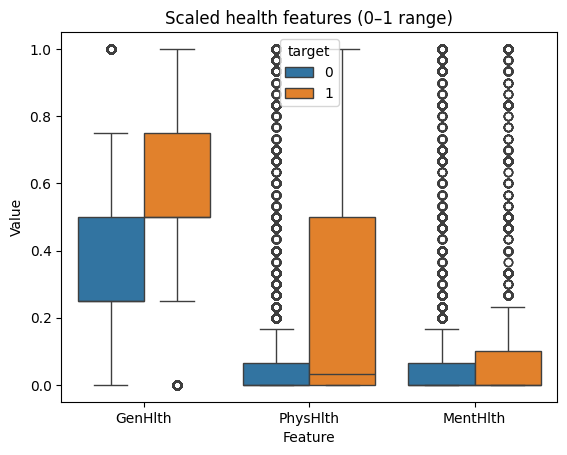

In [48]:
health_features = ["GenHlth", "PhysHlth", "MentHlth"]
df_scaled = df.copy()

scaler = MinMaxScaler()
df_scaled[health_features] = scaler.fit_transform(df_scaled[health_features])

df_melted = df_scaled.melt(id_vars="target", value_vars=health_features,
                           var_name="Feature", value_name="Value")

sns.boxplot(data=df_melted, x="Feature", y="Value", hue="target")
plt.title("Scaled health features (0–1 range)")
plt.show()

The distributions of Mental Health and Physical Health appear quite similar, and both are correlated with General Health. Moreover, the information captured by Physical Health may partly overlap with the Physical Activity variable, which could already account for limitations in daily functioning. Therefore, dropping Physical Health might simplify the model while retaining most of the relevant information, reducing redundancy between predictors.

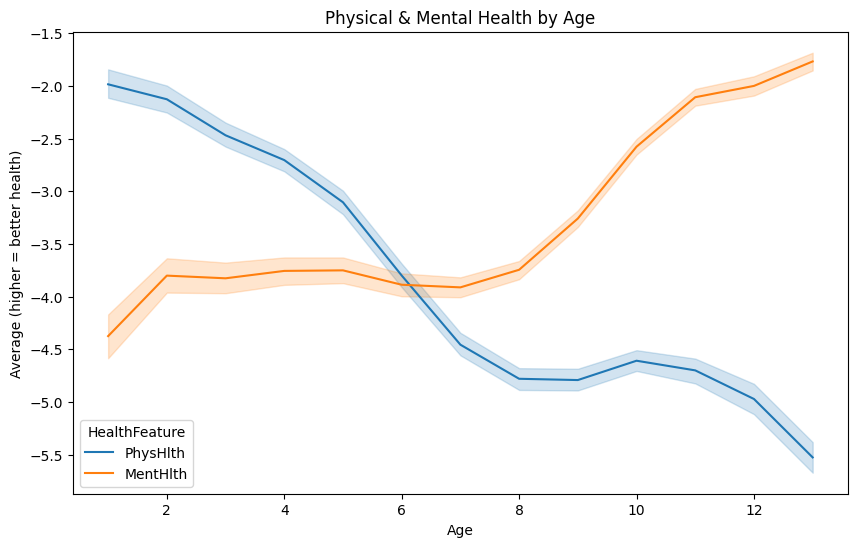

In [49]:
health_df = X[['Age', 'PhysHlth', 'MentHlth']].copy()

# Invert values as higher values indicate worse health
health_df['PhysHlth'] = -health_df['PhysHlth']
health_df['MentHlth'] = -health_df['MentHlth']

health_long = health_df.melt(
    id_vars="Age", 
    value_vars=["PhysHlth", "MentHlth"], 
    var_name="HealthFeature", 
    value_name="Score"
)

plt.figure(figsize=(10,6))
sns.lineplot(data=health_long, x="Age", y="Score", hue="HealthFeature", estimator="mean")
plt.title("Physical & Mental Health by Age")
plt.ylabel("Average (higher = better health)")
plt.show()


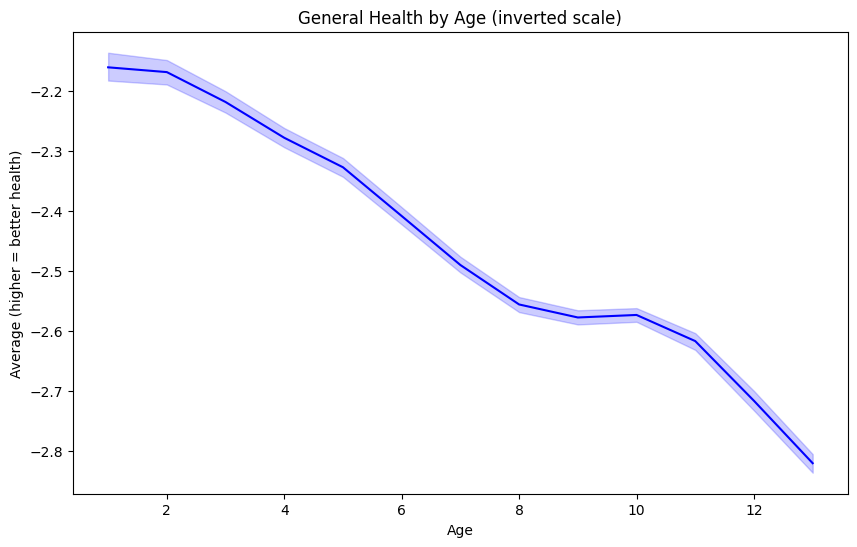

In [50]:
health_df = X[['Age', 'GenHlth']].copy()


health_df['GenHlth'] = -health_df['GenHlth']

plt.figure(figsize=(10,6))
sns.lineplot(data=health_df, x="Age", y="GenHlth", estimator="mean", color="blue")
plt.title("General Health by Age (inverted scale)")
plt.ylabel("Average (higher = better health)")
plt.show()


Physical health seem to follow almost exactly the same pattern as general health, i.e., gets worse with age. Mental health on the other hand gets better.

In [51]:
X.head()

,HighBP,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
2,1,28,0,0,0,0,1,0,0,5,30,30,1,0,9
3,1,27,0,0,0,1,1,1,0,2,0,0,0,0,11
4,1,24,0,0,0,1,1,1,0,2,3,0,0,0,11


<Axes: title={'center': 'Diabetes'}, xlabel='Diabetes_binary'>

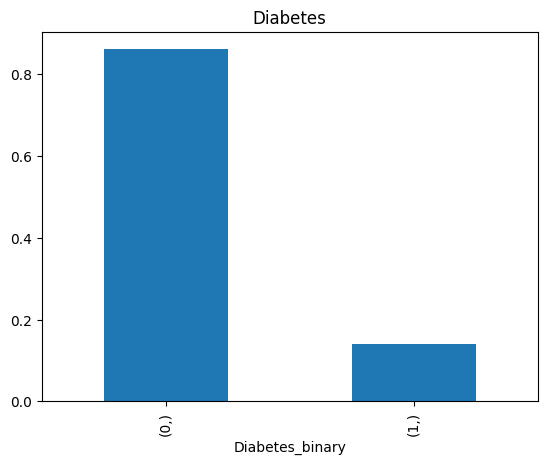

In [52]:
y.value_counts(normalize=True).plot(kind="bar", title="Diabetes")

# Model

In [53]:
X_ml = X.to_numpy()
y_ml = y.to_numpy().ravel()

In [54]:
print(y_ml.shape)

(253680,)


In [55]:
X_small, _, y_small, _ = train_test_split(
    X_ml, y_ml, train_size=20000, stratify=y, random_state=42
)


Because of the large dataset I will start by training on a small subset (n=20 000). Based on the result I will move on with the best model and train on the whole dataset.

In [57]:
# Dict of classifiers with tuned hyperparameters
classifiers = {
    "Decision Tree (depth=10)": DecisionTreeClassifier(
        max_depth=10, 
        min_samples_leaf=1,             
        class_weight="balanced", 
        random_state=42
    ),

    "Decision Tree (depth=5)": DecisionTreeClassifier(
        max_depth=5, 
        min_samples_leaf=5,             
        class_weight="balanced", 
        random_state=42
    ),

    "Random Forest (600 trees)": RandomForestClassifier(
        n_estimators=600, 
        max_depth=None,                 
        min_samples_leaf=1, 
        class_weight="balanced_subsample",
        max_features="sqrt",
        n_jobs=-1, 
        random_state=42
    ),

    "Random Forest (200 trees)": RandomForestClassifier(
        n_estimators=200, 
        max_depth=None, 
        min_samples_leaf=1, 
        class_weight="balanced_subsample",
        max_features="sqrt",
        n_jobs=-1, 
        random_state=42
    ),

    "SVM (rbf)": SVC(
        kernel='rbf', 
        C=0.5,                           
        gamma='scale',                  
        class_weight='balanced',         
        probability=True,                
        random_state=42
    ),

    "SVM (linear)": SVC(
        kernel='linear', 
        C=0.3,                           
        class_weight='balanced', 
        probability=True,
        random_state=42
    ),

    "LogReg (L2)": LogisticRegression(
        penalty='l2', 
        C=0.5,                           
        class_weight='balanced', 
        solver='liblinear', 
        max_iter=2000,
        random_state=42
    ),

    "LogReg (L1)": LogisticRegression(
        penalty='l1', 
        C=1.0, 
        class_weight='balanced', 
        solver='liblinear', 
        max_iter=2000,
        random_state=42
    ),

   
    "HistGradientBoosting": HistGradientBoostingClassifier(
        max_depth=5,                     
        learning_rate=0.05,              
        max_iter=600,                    
        early_stopping=False,            
        l2_regularization=0.0, 
        max_bins=255,
        random_state=42
    ),

    
    "XGBoost": XGBClassifier(
        n_estimators=600,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=1,
        reg_lambda=1.0,
        eval_metric="aucpr",             
        scale_pos_weight=scale_pos,     
        n_jobs=-1,
        random_state=42
    ),
}

In [58]:
# Define which metrics to track during cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = []

# Loop through each classifier
for name, clf in classifiers.items():
    # Start timer for training + cross-validated prediction
    t_start = time.time()

    # Perform 5-fold cross-validation
    scores = cross_validate(
        clf,
        X_small,
        y_small,
        cv=5,
        scoring=scoring,
        return_train_score=False
    )

    t_end = time.time()

    # Estimate total time and split roughly 50/50 between training and prediction
    total_time = t_end - t_start
    training_time = total_time / 2
    prediction_time = total_time / 2

    # Save mean scores across all folds
    result = {
        "classifier_name": name,
        "training_time": round(training_time, 4),
        "prediction_time": round(prediction_time, 4),
        "accuracy": scores['test_accuracy'].mean(),
        "precision": scores['test_precision'].mean(),
        "recall": scores['test_recall'].mean(),
        "f1": scores['test_f1'].mean()
    }

    cv_results.append(result)

# Convert results to DataFrame
results = pd.DataFrame(cv_results)
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,Decision Tree (depth=10),0.0683,0.0683,0.70675,0.281451,0.708291,0.402651
1,Decision Tree (depth=5),0.0412,0.0412,0.67905,0.276824,0.804463,0.411583
2,Random Forest (600 trees),4.5049,4.5049,0.84875,0.386789,0.143518,0.208878
3,Random Forest (200 trees),1.5297,1.5297,0.84740,0.376359,0.141007,0.204577
4,SVM (rbf),83.3447,83.3447,0.69385,0.286980,0.806248,0.423272
5,SVM (linear),76.1908,76.1908,0.70475,0.293851,0.796564,0.429294
6,LogReg (L2),0.1004,0.1004,0.72685,0.307523,0.766419,0.438893
7,LogReg (L1),0.3219,0.3219,0.72780,0.307846,0.763191,0.438692
8,HistGradientBoosting,2.1073,2.1073,0.85935,0.485243,0.149623,0.228628
9,XGBoost,1.3972,1.3972,0.73110,0.308536,0.748119,0.436853


In [59]:
# Training with grid search and cross-validation
pos = (y_small == 1).sum()
neg = (y_small == 0).sum()
scale_pos = (neg / pos) if pos else 1.0                
sw_balanced = compute_sample_weight("balanced", y_small)

models_and_grids = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        {"clf__max_depth": [3, 5, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced"),
        {"clf__n_estimators": [200, 500], "clf__max_depth": [5, 8]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"clf__n_estimators": [100, 200], "clf__max_depth": [3, 5]}
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {"clf__max_depth": [3, 5]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="aucpr", random_state=42, n_jobs=-1, scale_pos_weight=scale_pos),
        {"clf__n_estimators": [100, 200], "clf__max_depth": [3, 5]}
    ),
    "SVM (linear)": (
        SVC(kernel="linear", probability=False, random_state=42, class_weight="balanced"),
        {"clf__C": [0.1, 1, 10]}
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=500, solver="liblinear", random_state=42, class_weight="balanced"),
        {"clf__C": [0.1, 1, 10]}
    ),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"pr_auc": "average_precision", "roc_auc": "roc_auc", "f1": "f1"}

results = []
for name, (clf, param_grid) in models_and_grids.items():
    pipe = Pipeline([("scaler", StandardScaler()), ("clf", clf)])
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, refit='f1', n_jobs=-1)
    fit_params = {}
    if name in ['Gradient Boosting', 'HistGradientBoosting']:
        fit_params = {"clf__sample_weight": sw_balanced}

    grid.fit(X_small, y_small, **fit_params)
    results.append({
    "model": name,
    "best_parameters": grid.best_params_,
    "best_f1": grid.best_score_
})


results_df = pd.DataFrame(results)
results_df

,model,best_parameters,best_f1
0,Decision Tree,{'clf__max_depth': 5},0.412351
1,Random Forest,"{'clf__max_depth': 8, 'clf__n_estimators': 500}",0.439177
2,Gradient Boosting,"{'clf__max_depth': 5, 'clf__n_estimators': 100}",0.438586
3,HistGradientBoosting,{'clf__max_depth': 3},0.438833
4,XGBoost,"{'clf__max_depth': 3, 'clf__n_estimators': 100}",0.438824
5,SVM (linear),{'clf__C': 0.1},0.428503
6,Logistic Regression,{'clf__C': 0.1},0.438749


Random Forest performance:
Accuracy: 0.7136352885525071
Precision: 0.297326668115627
Recall: 0.7740840288583958
F1: 0.42963137439641974
ROC-AUC: 0.8129813555744385

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     43667
           1       0.30      0.77      0.43      7069

    accuracy                           0.71     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.71      0.76     50736



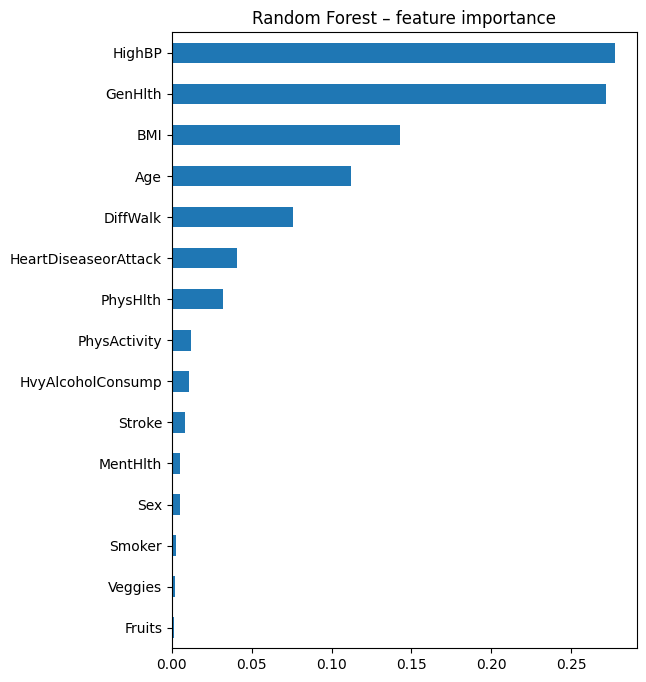


XGBoost performance:
Accuracy: 0.8637456638284453
Precision: 0.5419354838709678
Recall: 0.14259442636865186
F1: 0.2257811625041998
ROC-AUC: 0.8177483047012427

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.54      0.14      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



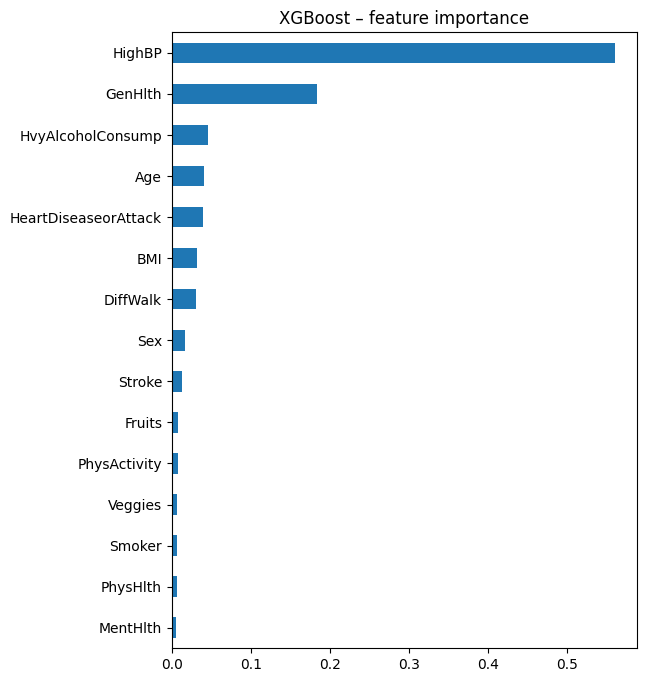

In [60]:
# Check feature importances for tree-based models
X_tr, X_val, y_tr, y_val = train_test_split(X_ml, y_ml, test_size=0.2, stratify=y, random_state=42)

# RF
rf = RandomForestClassifier(n_estimators=300, max_depth=8, n_jobs=-1, class_weight="balanced", random_state=42)
rf.fit(X_tr, y_tr)

rf_preds = rf.predict(X_val)
rf_probs = rf.predict_proba(X_val)[:, 1]  

print("Random Forest performance:")
print("Accuracy:", accuracy_score(y_val, rf_preds))
print("Precision:", precision_score(y_val, rf_preds))
print("Recall:", recall_score(y_val, rf_preds))
print("F1:", f1_score(y_val, rf_preds))
print("ROC-AUC:", roc_auc_score(y_val, rf_probs))
print("\nClassification report:\n", classification_report(y_val, rf_preds))


rf_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
rf_imp.plot(kind="barh", figsize=(6,8))
plt.title("Random Forest – feature importance")
plt.show()

# XGBoost
xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1,
                    eval_metric="aucpr", n_jobs=-1, random_state=42)
xgb.fit(X_tr, y_tr)

xgb_preds = xgb.predict(X_val)
xgb_probs = xgb.predict_proba(X_val)[:, 1]

print("\nXGBoost performance:")
print("Accuracy:", accuracy_score(y_val, xgb_preds))
print("Precision:", precision_score(y_val, xgb_preds))
print("Recall:", recall_score(y_val, xgb_preds))
print("F1:", f1_score(y_val, xgb_preds))
print("ROC-AUC:", roc_auc_score(y_val, xgb_probs))
print("\nClassification report:\n", classification_report(y_val, xgb_preds))

xgb_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=True)
xgb_imp.plot(kind="barh", figsize=(6,8))
plt.title("XGBoost – feature importance")
plt.show()

In [61]:
# Here is where i gave up and just asked chatGPT

# class weights & scale_pos_weight (utan .value_counts)
sw_balanced = compute_sample_weight("balanced", y_small)
pos = int((y_small == 1).sum())
neg = int((y_small == 0).sum())
scale_pos = (neg / pos) if pos else 1.0

# 2) Scorers som gynnar recall (F2 > F1). Refit på F2.
f2_scorer = make_scorer(fbeta_score, beta=2)
recall_scorer = make_scorer(recall_score)

scoring = {
    "pr_auc": "average_precision",
    "roc_auc": "roc_auc",
    "f1": "f1",
    "f2": f2_scorer,
    "recall": recall_scorer,
}

# 3) Modeller + grid (något utökad för recall)
models_and_grids = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        {"clf__max_depth": [3, 5, 10], "clf__min_samples_leaf": [1, 5, 20]}
    ),
    "Random Forest": (
        RandomForestClassifier(
            n_jobs=-1, random_state=42, class_weight="balanced_subsample"
        ),
        {"clf__n_estimators": [300, 600], "clf__max_depth": [5, 8, None],
         "clf__min_samples_leaf": [1, 5]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"clf__n_estimators": [200, 400], "clf__max_depth": [3, 5]}
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {"clf__max_depth": [None, 3, 5]}
    ),
    "XGBoost": (
        XGBClassifier(
            eval_metric="aucpr", random_state=42, n_jobs=-1,
            scale_pos_weight=scale_pos
        ),
        {"clf__n_estimators": [300, 600], "clf__max_depth": [3, 5],
         "clf__subsample": [0.7, 1.0], "clf__colsample_bytree": [0.7, 1.0]}
    ),
    "SVM (linear)": (
        SVC(kernel="linear", probability=False, random_state=42, class_weight="balanced"),
        {"clf__C": [0.05, 0.1, 1, 10]}
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=2000, solver="saga", random_state=42, class_weight="balanced"),
        {"clf__C": [0.05, 0.1, 1, 10], "clf__penalty": ["l1", "l2"]}
    ),
}

# 4) Skala bara där det behövs (träd ignorerar skala)
use_scaler = StandardScaler()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def needs_scaling(model_name: str) -> bool:
    # Endast linjära modeller behöver skala; träd (inkl. XGBoost) gör inte det
    return model_name in {"SVM (linear)", "Logistic Regression"}

def supports_sample_weight(model_name: str) -> bool:
    return model_name in {
        "Decision Tree","Random Forest","Gradient Boosting",
        "HistGradientBoosting","XGBoost","SVM (linear)","Logistic Regression"
    }

results = []
best_estimators = {}

for name, (clf, param_grid) in models_and_grids.items():
    steps = []
    steps.append(("scaler", use_scaler if needs_scaling(name) else "passthrough"))
    steps.append(("clf", clf))
    pipe = Pipeline(steps)

    grid = GridSearchCV(
        pipe, param_grid=param_grid, cv=cv, scoring=scoring, refit="f2", n_jobs=-1
    )

    fit_params = {}
    if supports_sample_weight(name):
        fit_params["clf__sample_weight"] = sw_balanced

    grid.fit(X_small, y_small, **fit_params)
    results.append({
        "model": name,
        "best_parameters": grid.best_params_,
        "best_f2": grid.best_score_,
        "cv_recall": grid.cv_results_[f"mean_test_recall"][grid.best_index_],
        "cv_f1": grid.cv_results_[f"mean_test_f1"][grid.best_index_],
        "cv_pr_auc": grid.cv_results_[f"mean_test_pr_auc"][grid.best_index_],
    })
    best_estimators[name] = grid.best_estimator_

results_df = pd.DataFrame(results).sort_values("best_f2", ascending=False)
results_df

,model,best_parameters,best_f2,cv_recall,cv_f1,cv_pr_auc
3,HistGradientBoosting,{'clf__max_depth': 3},0.599686,0.793681,0.438833,0.402401
2,Gradient Boosting,"{'clf__max_depth': 3, 'clf__n_estimators': 400}",0.593758,0.773230,0.440528,0.392114
6,Logistic Regression,"{'clf__C': 0.05, 'clf__penalty': 'l1'}",0.590534,0.766045,0.439543,0.383570
1,Random Forest,"{'clf__max_depth': None, 'clf__min_samples_lea...",0.588744,0.848931,0.403357,0.378890
4,XGBoost,"{'clf__colsample_bytree': 1.0, 'clf__max_depth...",0.561075,0.907777,0.356745,0.356722
0,Decision Tree,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.538267,0.897020,0.336486,0.338569
5,SVM (linear),{'clf__C': 0.05},0.447380,1.000000,0.244613,0.339115


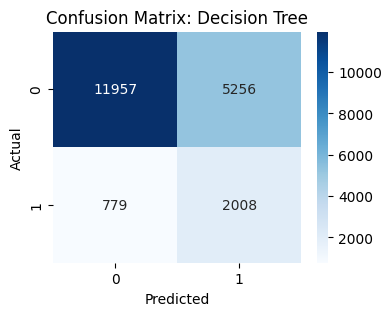

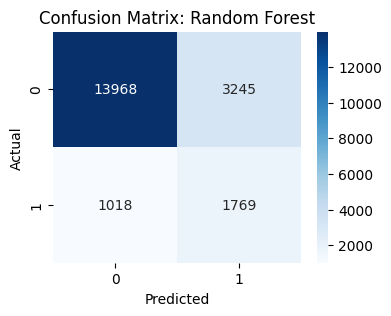

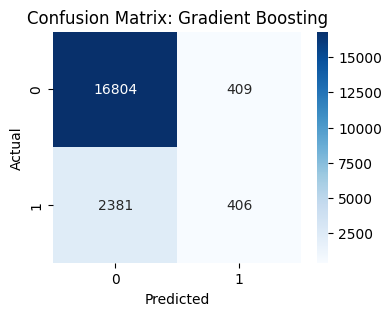

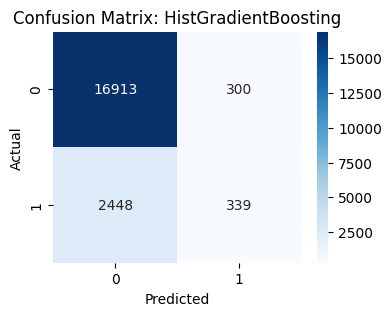

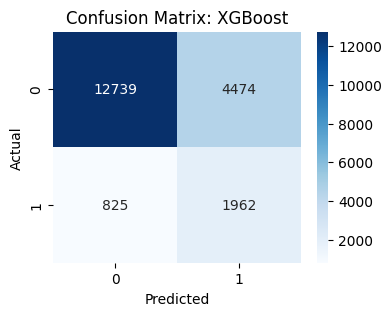

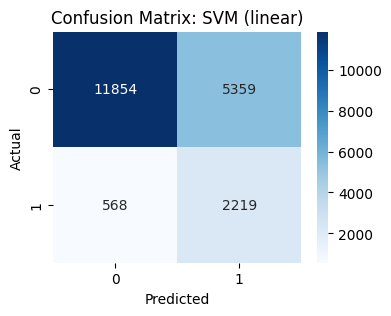

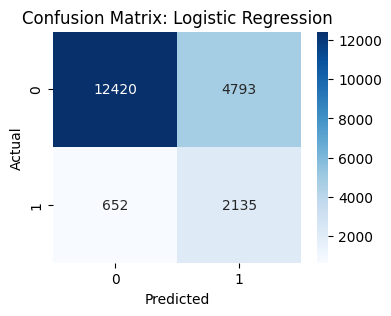

Decision Tree:
  TN=11957, FP=5256, FN=779, TP=2008

Random Forest:
  TN=13968, FP=3245, FN=1018, TP=1769

Gradient Boosting:
  TN=16804, FP=409, FN=2381, TP=406

HistGradientBoosting:
  TN=16913, FP=300, FN=2448, TP=339

XGBoost:
  TN=12739, FP=4474, FN=825, TP=1962

SVM (linear):
  TN=11854, FP=5359, FN=568, TP=2219

Logistic Regression:
  TN=12420, FP=4793, FN=652, TP=2135



In [62]:
# Confusion matrices for chatgpt code

conf_mats = {}

for name, est in best_estimators.items():
    # Gör CV-prediktioner på samma data
    y_pred = cross_val_predict(est, X_small, y_small, cv=cv, n_jobs=-1)

    # Beräkna confusion matrix
    cm = confusion_matrix(y_small, y_pred, labels=[0, 1])
    conf_mats[name] = cm

    # Plotta snyggt
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Om du även vill ha siffrorna direkt:
for name, cm in conf_mats.items():
    tn, fp, fn, tp = cm.ravel()
    print(f"{name}:")
    print(f"  TN={tn}, FP={fp}, FN={fn}, TP={tp}\n")


## Attempt 2, leaner model

In [63]:
X["BMI_core"] = X["BMI"].clip(lower=15, upper=60)
X = X.drop(columns=['BMI'])
X.head()

,HighBP,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,BMI_core
0,1,1,0,0,0,0,1,0,5,18,15,1,0,9,40
1,0,1,0,0,1,0,0,0,3,0,0,0,0,7,25
2,1,0,0,0,0,1,0,0,5,30,30,1,0,9,28
3,1,0,0,0,1,1,1,0,2,0,0,0,0,11,27
4,1,0,0,0,1,1,1,0,2,3,0,0,0,11,24


In [64]:
X_lean = X[['HighBP', 'BMI_core', 'HeartDiseaseorAttack', 'GenHlth', 'Age', 'PhysActivity']]

In [65]:
X_lean = X_lean.to_numpy()
y_lean = y.to_numpy().ravel()

In [66]:
X_small, _, y_small, _ = train_test_split(
    X_lean, y_lean, train_size=20000, stratify=y, random_state=42
)

In [67]:
# Define which metrics to track during cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = []

# Loop through each classifier
for name, clf in classifiers.items():
    # Start timer for training + cross-validated prediction
    t_start = time.time()

    # Perform 5-fold cross-validation
    scores = cross_validate(
        clf,
        X_small,
        y_small,
        cv=5,
        scoring=scoring,
        return_train_score=False
    )

    t_end = time.time()

    # Estimate total time and split roughly 50/50 between training and prediction
    total_time = t_end - t_start
    training_time = total_time / 2
    prediction_time = total_time / 2

    # Save mean scores across all folds
    result = {
        "classifier_name": name,
        "training_time": round(training_time, 4),
        "prediction_time": round(prediction_time, 4),
        "accuracy": scores['test_accuracy'].mean(),
        "precision": scores['test_precision'].mean(),
        "recall": scores['test_recall'].mean(),
        "f1": scores['test_f1'].mean()
    }

    cv_results.append(result)

# Convert results to DataFrame
results = pd.DataFrame(cv_results)
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,Decision Tree (depth=10),0.0395,0.0395,0.70490,0.284257,0.735210,0.409971
1,Decision Tree (depth=5),0.0298,0.0298,0.67620,0.275082,0.805537,0.409807
2,Random Forest (600 trees),5.5722,5.5722,0.78145,0.300858,0.429503,0.353769
3,Random Forest (200 trees),1.8602,1.8602,0.78030,0.299217,0.429864,0.352696
4,SVM (rbf),69.3330,69.3330,0.70230,0.292267,0.798719,0.427895
5,SVM (linear),53.3576,53.3576,0.70240,0.291519,0.793694,0.426410
6,LogReg (L2),0.0480,0.0480,0.72400,0.304295,0.762118,0.434912
7,LogReg (L1),0.2793,0.2793,0.72485,0.304894,0.761042,0.435339
8,HistGradientBoosting,1.7876,1.7876,0.86220,0.521312,0.132401,0.211069
9,XGBoost,0.7583,0.7583,0.71245,0.297091,0.777547,0.429883


In [68]:
# Again with grid search and cross-validation

pos = (y_small == 1).sum()
neg = (y_small == 0).sum()
scale_pos = (neg / pos) if pos else 1.0                
sw_balanced = compute_sample_weight("balanced", y_small)

models_and_grids = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        {"clf__max_depth": [3, 5, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced"),
        {"clf__n_estimators": [200, 500], "clf__max_depth": [5, 8]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"clf__n_estimators": [100, 200], "clf__max_depth": [3, 5]}
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {"clf__max_depth": [3, 5]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="aucpr", random_state=42, n_jobs=-1, scale_pos_weight=scale_pos),
        {"clf__n_estimators": [100, 200], "clf__max_depth": [3, 5]}
    ),
    "SVM (linear)": (
        SVC(kernel="linear", probability=False, random_state=42, class_weight="balanced"),
        {"clf__C": [0.1, 1, 10]}
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=500, solver="liblinear", random_state=42, class_weight="balanced"),
        {"clf__C": [0.1, 1, 10]}
    ),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"pr_auc": "average_precision", "roc_auc": "roc_auc", "f1": "f1"}

results = []
for name, (clf, param_grid) in models_and_grids.items():
    pipe = Pipeline([("scaler", StandardScaler()), ("clf", clf)])
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, refit='f1', n_jobs=-1)
    fit_params = {}
    if name in ['Gradient Boosting', 'HistGradientBoosting']:
        fit_params = {"clf__sample_weight": sw_balanced}

    grid.fit(X_small, y_small, **fit_params)
    results.append({
    "model": name,
    "best_parameters": grid.best_params_,
    "best_f1": grid.best_score_
})


results_df = pd.DataFrame(results)
results_df

,model,best_parameters,best_f1
0,Decision Tree,{'clf__max_depth': 10},0.412675
1,Random Forest,"{'clf__max_depth': 5, 'clf__n_estimators': 500}",0.428837
2,Gradient Boosting,"{'clf__max_depth': 3, 'clf__n_estimators': 100}",0.434171
3,HistGradientBoosting,{'clf__max_depth': 3},0.431353
4,XGBoost,"{'clf__max_depth': 3, 'clf__n_estimators': 100}",0.431030
5,SVM (linear),{'clf__C': 0.1},0.424299
6,Logistic Regression,{'clf__C': 10},0.434428


# References

1. https://www.1177.se/Stockholm/sa-fungerar-varden/att-valja-vardmottagning/valja-vardmottagning/om-listning-och-avlistning/
2. https://www.informationsverige.se/sv/jag-har-fatt-uppehallstillstand/om-du-behover-vard.html/
